AIR QUALITY INDEX PREDICTION

Volatile Organic Materials

PM2.5
PM10
NO
NO2
NH3
CO
SO2
O3
Benzene
Toluene
Xylene  

VOCs → Benzene, Toluene, Xylene, 
PM (Particulate Matter) → PM2.5, PM10, 
Gaseous Pollutants (Not VOCs) → NO, NO2, NH3, CO, SO2, O3

In [2]:
pip install jupyter


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install notebook

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
import matplotlib.pyplot as plt

In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [9]:
import seaborn as sns

In [10]:
from warnings import filterwarnings
filterwarnings('ignore')


In [11]:
df= pd.read_csv('air quality data.csv')

In [25]:
df.head() #top 5 rows

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


In [13]:
df.shape

(29531, 16)

In [26]:
df.info #information

<bound method DataFrame.info of                 City        Date   PM2.5   PM10     NO    NO2    NOx    NH3  \
28         Ahmedabad  2015-01-29   83.13    NaN   6.93  28.71  33.72    NaN   
29         Ahmedabad  2015-01-30   79.84    NaN  13.85  28.68  41.08    NaN   
30         Ahmedabad  2015-01-31   94.52    NaN  24.39  32.66  52.61    NaN   
31         Ahmedabad  2015-02-01  135.99    NaN  43.48  42.08  84.57    NaN   
32         Ahmedabad  2015-02-02  178.33    NaN  54.56  35.31  72.80    NaN   
...              ...         ...     ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27   15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28   24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29   22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30   16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01   15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2

In [27]:
df.duplicated().sum() #to know the duplicate values

0

In [16]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [29]:
df.dropna(subset=['AQI'],inplace= True) #dropping the rows where aqi has missing values

In [28]:
df.isnull().sum().sort_values(ascending=False) #checking missing values

Xylene        15372
PM10           7086
NH3            6536
Toluene        5826
Benzene        3535
NOx            1857
O3              807
PM2.5           678
SO2             605
CO              445
NO2             391
NO              387
City              0
Date              0
AQI               0
AQI_Bucket        0
dtype: int64

In [30]:
df.shape #changed

(24850, 16)

In [20]:
print(df.dtypes)

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object


In [31]:
df.describe().T #T--> transpose

,count,mean,std,min,25%,50%,75%,max
PM2.5,24172.0,67.476613,63.075398,0.04,29.0000,48.785,80.9250,914.94
PM10,17764.0,118.454435,89.487976,0.03,56.7775,96.180,150.1825,917.08
NO,24463.0,17.622421,22.421138,0.03,5.6600,9.910,20.0300,390.68
NO2,24459.0,28.978391,24.627054,0.01,11.9400,22.100,38.2400,362.21
NOx,22993.0,32.289012,30.712855,0.00,13.1100,23.680,40.1700,378.24
NH3,18314.0,23.848366,25.875981,0.01,8.9600,16.310,30.3600,352.89
CO,24405.0,2.345267,7.075208,0.00,0.5900,0.930,1.4800,175.81
SO2,24245.0,14.362933,17.428693,0.01,5.7300,9.220,15.1400,186.08
O3,24043.0,34.912885,21.724525,0.01,19.2500,31.250,46.0800,257.73
Benzene,21315.0,3.458668,16.036020,0.00,0.2300,1.290,3.3400,455.03


In [32]:
null_values_percentage=(df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
null_values_percentage #checking percentage of null values

Xylene        61.859155
PM10          28.515091
NH3           26.301811
Toluene       23.444668
Benzene       14.225352
NOx            7.472837
O3             3.247485
PM2.5          2.728370
SO2            2.434608
CO             1.790744
NO2            1.573441
NO             1.557344
City           0.000000
Date           0.000000
AQI            0.000000
AQI_Bucket     0.000000
dtype: float64

finding correlations between pollutants
This identifies which pollutants impact AQI the most

checking aqi distribution by plotting histogram

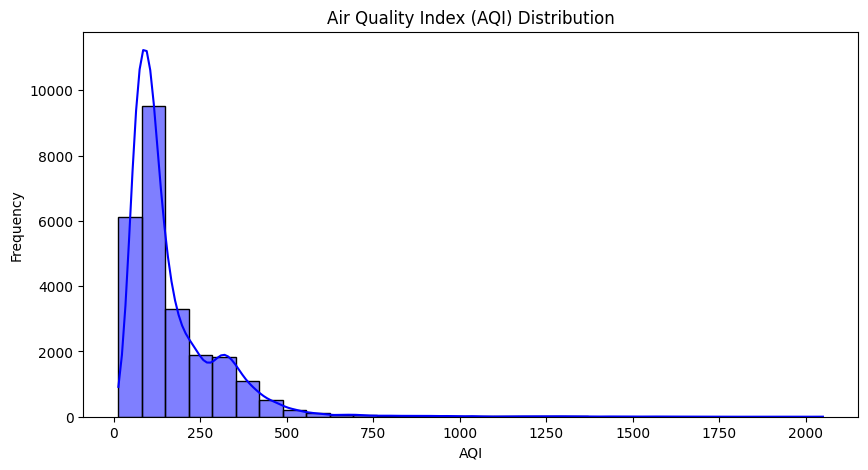

In [23]:
plt.figure(figsize=(10,5))  # Creates a figure with a width of 10 and height of 5.  
sns.histplot(df["AQI"], bins=30, kde=True, color='blue')  # Plots a histogram of AQI with 30 bins, adds a KDE curve, and sets color to blue.  
plt.title("Air Quality Index (AQI) Distribution")  # Adds a title to the plot.  
plt.xlabel("AQI")  # Labels the X-axis as "AQI".  
plt.ylabel("Frequency")  # Labels the Y-axis as "Frequency".  
plt.show()  # Displays the plot.  



key considerations


Xylene has the highest percentage of missing values - 61.86%, PM10 has 28.6% and NH3 has 26.3%